http://www4.comp.polyu.edu.hk/~cskchung/COMP4432/Data_Product.html
https://www.kaggle.com/code/thebrownviking20/k-means-clustering-of-1-million-headlines#NLP
https://github.com/teresanan/topic-modeling-of-news-headlines/blob/master/topic_modeling_of_news_headlines.ipynb
https://towardsdatascience.com/sentiment-analysis-on-news-headlines-classic-supervised-learning-vs-deep-learning-approach-831ac698e276


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
# df = pd.read_csv("../input/million-headlines/abcnews-date-text.csv")
df = pd.read_csv('./abcnews-date-text.csv')
data = df[:10000]
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [64]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Remove special characters, digits and convert to lower case
def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.casefold() not in stop_words]
    return ' '.join(filtered_words)

# Perform contraction mapping
def replace_contractions(text):
    contractions_dict = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'll": "I will",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)


In [65]:
processed_text = []
for i in tqdm(data["headline_text"].values):
    sentance = replace_contractions(i)
    sentance = re.sub("\S*\d\S*", "", sentance)
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = remove_stopwords(sentance)
    processed_text.append(sentance)
    
data["Clean_text"] = processed_text
data.head()

100%|██████████| 10000/10000 [00:03<00:00, 3189.76it/s]
/var/folders/jd/0vt9x0wn5lj6sjzcc_cd36g00000gn/T/ipykernel_39704/584628816.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Clean_text"] = processed_text


,publish_date,headline_text,Clean_text
0,20030219,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,20030219,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation
2,20030219,a g calls for infrastructure protection summit,g calls infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,20030219,air nz strike to affect australian travellers,air nz strike affect australian travellers


In [66]:
# Bag-Of-Word (BOW)
# 1. use CountVectorizer to transform text into vector representation
# 2. use KMeans for clustering analysis,
# 3. Explore the impact of different numbers of clusters on classification effectiveness, 
# 4. use seaborn to draw a line chart to present the loss value of different numbers of clusters.
from sklearn.cluster import KMeans
final_data = data[0:100000]
bow = CountVectorizer(ngram_range=(1,2))
bow_vector = bow.fit_transform(final_data["Clean_text"])

clusters = [2,3,4,5,6,7,8,9]
inertia = []
for i in tqdm(clusters):
    k_mean= KMeans(n_clusters=i,n_init=10)
    k_mean.fit(bow_vector)
    inertia.append(k_mean.inertia_)

100%|██████████| 8/8 [00:03<00:00,  2.22it/s]


In [67]:
# Word Cloud
# 1. Obtain the optimal number of clusters by BOW
# 2. merge the texts belonging to the cluster into a long string.
# 3. use the WordCloud module to draw a word cloud of the text in the cluster
from wordcloud import WordCloud
def word_cloud(cluster_num):
    sentance = []
    num = cluster_num
    sent = final_data["Clean_text"][final_data["labels"]==num]
    for i in sent:
        sentance.append(i)
    sentance = ''.join(sentance)
    wordcloud = WordCloud(background_color="white").generate(sentance)
    print(f"Cluster Number: {num}")
    plt.figure(figsize=(9,6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

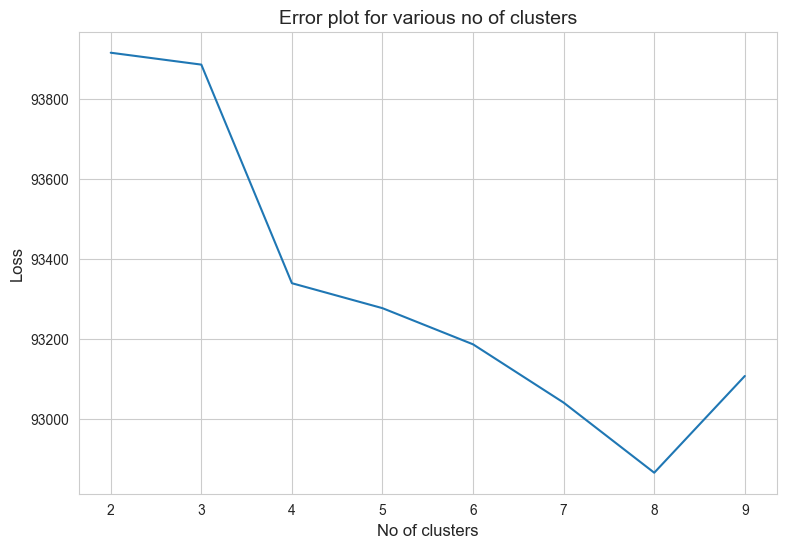

Minimum value: 92864.78933932645, Best no of clusters: 8


In [68]:
plt.figure(figsize=(9,6))
sns.set_style(style="whitegrid")
sns.lineplot(x=clusters, y=inertia)
plt.xlabel("No of clusters",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.title("Error plot for various no of clusters",fontsize=14)
plt.show()

min_idx = np.argmin(inertia)
min_value = inertia[min_idx]
best_cluster = clusters[min_idx]
print("Minimum value: " + str(min_value) + ", Best no of clusters: " + str(best_cluster))

In [69]:
# k_mean = KMeans(n_clusters=6,n_init=10)
k_mean = KMeans(n_clusters=best_cluster,n_init=10)
k_mean.fit(bow_vector)
final_data["labels"] = k_mean.labels_

/var/folders/jd/0vt9x0wn5lj6sjzcc_cd36g00000gn/T/ipykernel_39704/4226500429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["labels"] = k_mean.labels_


Number of clusters: 8


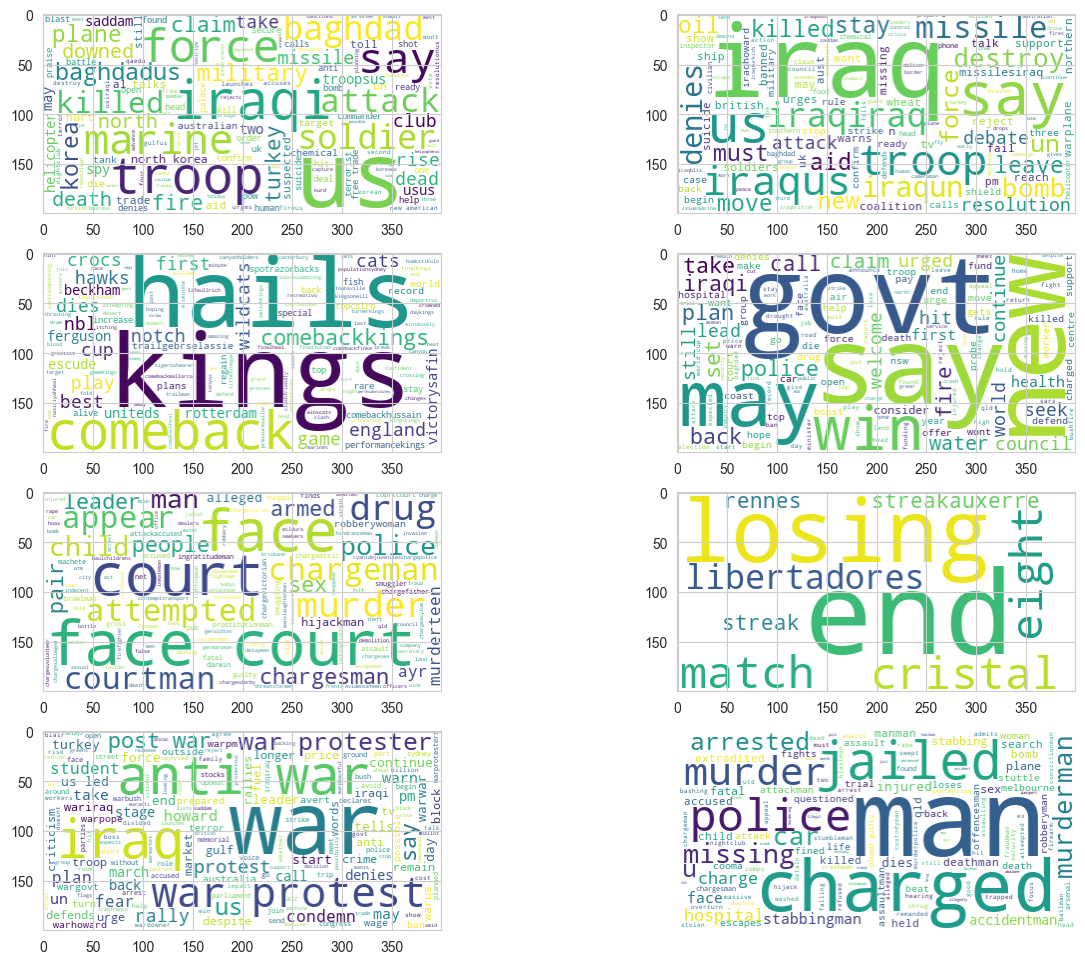

In [70]:
def NWordCloud(n_clusters):
    print("Number of clusters: " + str(n_clusters))
    
    plt.figure(figsize=(15,15))
    
    rows = int((n_clusters/2)+1) if type(n_clusters/2)==float else n_clusters/2
    for i in range(0,n_clusters):
        sentance = []
        num = i
        sent = final_data["Clean_text"][final_data["labels"]==num]
        for j in sent:
            sentance.append(j)
        sentance = ''.join(sentance)
        wordcloud = WordCloud(background_color="white").generate(sentance)
        plt.subplot(rows, 2, i+1)
        plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

NWordCloud(best_cluster)